## Data Visualisation

In [ ]:
#import essential libraries
!pip install wordcloud
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set() # Set default visuals 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.6/513.6 kB 37.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
dataset = pd.read_csv('cleaned_data.csv') #importing dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5688399 entries, 0 to 5688398
Data columns (total 8 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   Month                 int64  
 2   DayOfWeek             int64  
 3   Origin                object 
 4   Dest                  object 
 5   CRSDepTime            int64  
 6   DistanceGroup         int64  
 7   DepartureDelayGroups  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 347.2+ MB


### Isolating Predictors and Response Variables

In [ ]:
month = dataset['Month']
day_of_week = dataset['DayOfWeek']
origin = dataset['Origin']
dest = dataset['Dest']
dept_time = dataset['CRSDepTime']
dist_group = dataset['DistanceGroup']
delay_group = dataset['DepartureDelayGroups']


In [ ]:
# create a helper function to plot bar charts
def plot_barplot(data,x_label,y_label,plot_title, color):
    # count the frequency of each categorical value
    value_counts = data.value_counts().sort_index()

    # create a bar plot
    plt.figure(figsize=(16, 7))
    value_counts.plot(kind='bar', color= color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_title)
    plt.xticks(rotation=0,fontsize=12)  # rotate x-axis labels if needed
    plt.show()

### Representation of predictors using Bar Charts

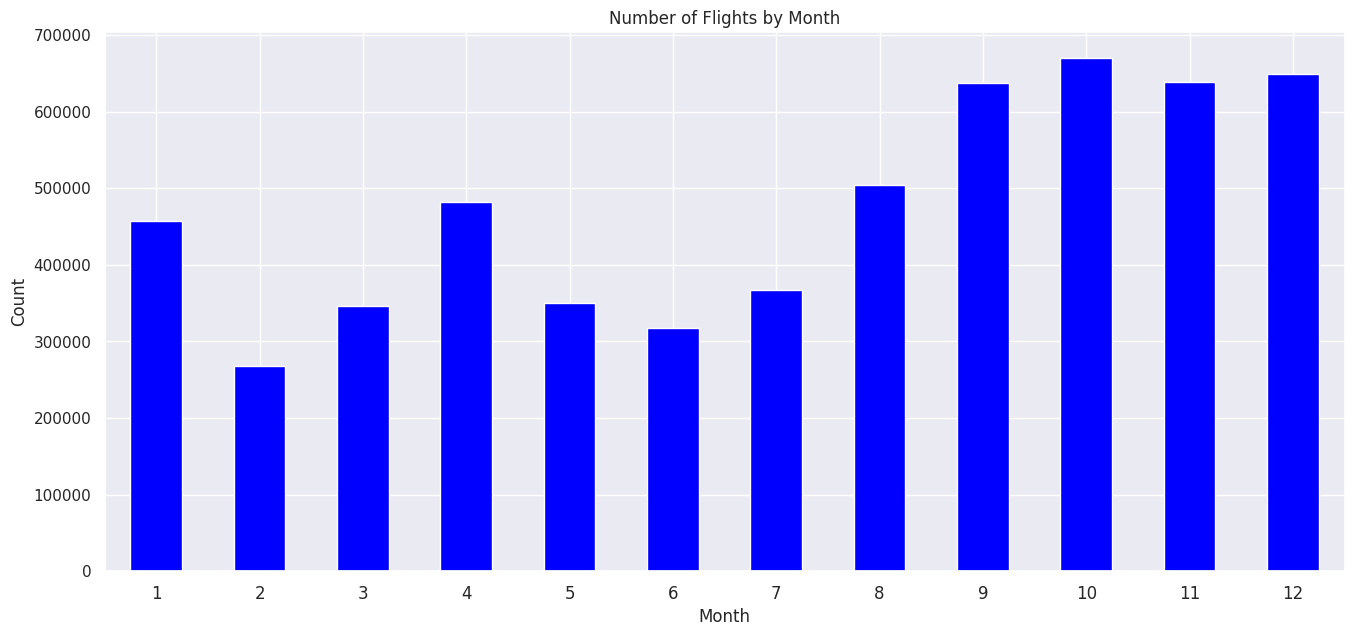

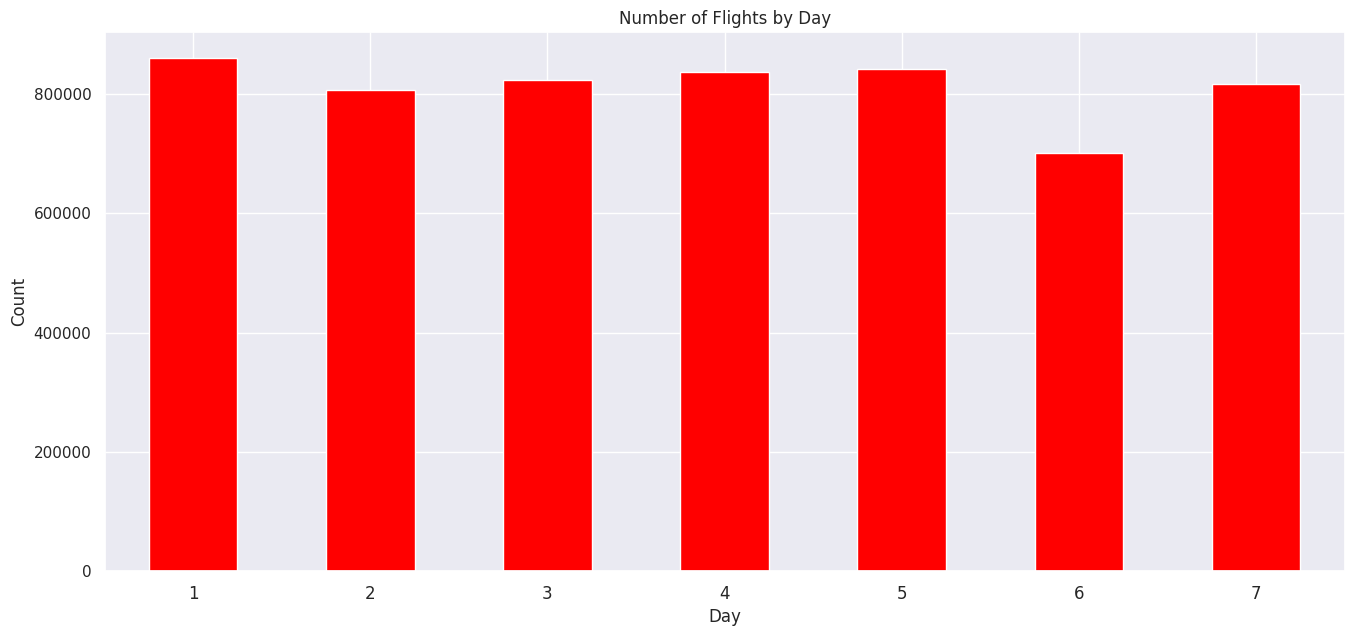

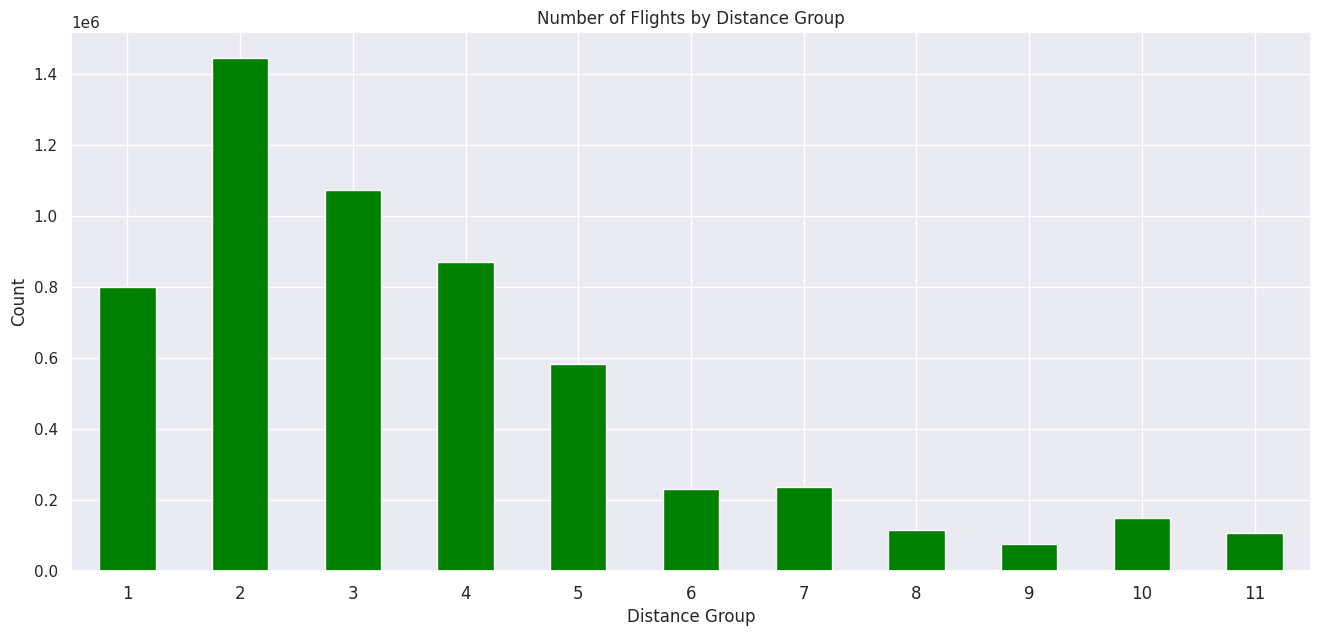

In [ ]:
plot_barplot(month,'Month','Count','Number of Flights by Month', 'blue')
plot_barplot(day_of_week,'Day','Count','Number of Flights by Day', 'red')
plot_barplot(dist_group,'Distance Group','Count','Number of Flights by Distance Group', 'green')

From the Month bar chart, we observed that as the year ends, the number of flights progressively increased, this might be due to the fact that there are a number of significant US holidays that between August and December, including Christmas, Thanksgiving, and Labour Day. More people will travel during these holidays to see family and friends, enjoy vacations, or go shopping. In addition, winter break for USA schools starts in December, hence more people will travel during this month.

### Representation of Scheduled Departure Time Predictor using Bar Charts

As seen from the value counts below, there are a total of 1365 distinct scheduled departure timings. This means that a total of 1365 categorical values are needed to fit into a single bar chart, which is not possible. Hence, we categorised each departure timing into its respective time category. 

1234  will be converted to "1200-1300"

0147 will be converted to "0100-0200"

In [ ]:
dept_time.value_counts()

CRSDepTime
600     111463
700      73314
800      43589
830      35401
1000     33513
         ...  
305          1
248          1
344          1
254          1
134          1
Name: count, Length: 1366, dtype: int64

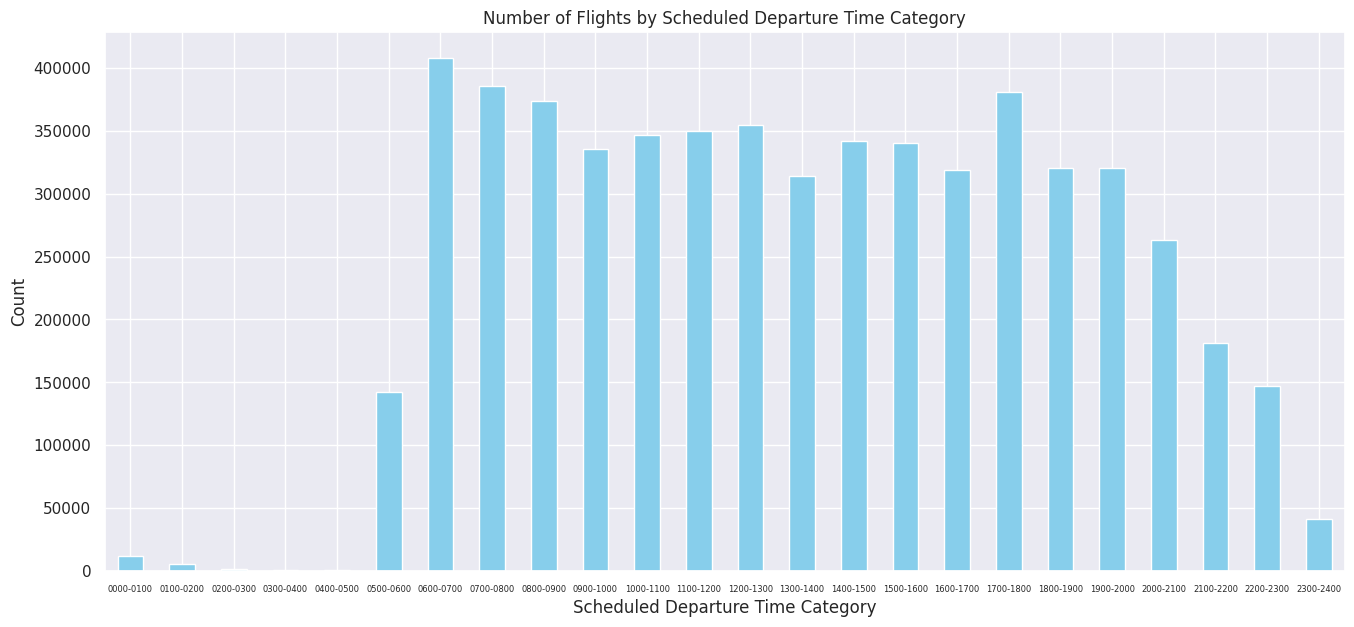

In [ ]:
# Convert 'departure_time' column to integers
dataset['CRSDepTime'] = dataset['CRSDepTime'].astype(int)

# Define function to categorize departure times into time intervals
def categorize_time(time):
    hour = time // 100  # Extract hour
    if hour<9:
        return f"0{hour}00-0{hour+1}00"
    elif hour==9:
        return f"0{hour}00-{hour+1}00"
    else:
        return f"{hour}00-{hour+1}00"  # Create time interval category

# Apply function to create new column with time categories
dataset['time_category'] = dataset['CRSDepTime'].apply(categorize_time)
time_category=dataset['time_category']
# count the frequency of each categorical value
value_counts = time_category.value_counts().sort_index()

# create a bar plot
plt.figure(figsize=(16, 7))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Scheduled Departure Time Category')
plt.ylabel('Count')
plt.title('Number of Flights by Scheduled Departure Time Category')
plt.xticks(rotation=0,fontsize=6)  # rotate x-axis labels if needed
plt.show()


From the schedule departure time bar chart, we observed that the peak periods are in the morning(from 0600-0900) and evening(1700-2000). This piece of information may be useful later in explaining the correlation between schedule departure time and departure delay.

### Representation of Remaining Data using Treemap

In [ ]:
origin_counts = origin.value_counts()
print(origin_counts)

Origin
ORD    289434
DEN    251899
ATL    223683
LAX    183553
IAH    163114
        ...  
WYS        52
GST        31
AKN        31
DLG        31
YNG         2
Name: count, Length: 370, dtype: int64


In [ ]:
dest_counts = dest.value_counts()
print(dest_counts)

Dest
ORD    289385
DEN    251924
ATL    223748
LAX    183575
IAH    163084
        ...  
WYS        52
DLG        31
AKN        31
GST        31
YNG         2
Name: count, Length: 370, dtype: int64


Due to the fact that origin and dest contain 370 distinct categories, it cannot be represented in a bar chart as it would overpopulate the axes. To circumvent this, we have decided to use a Treemap. This Treemap represents the top 50 largest categories (in this case airports) in proportion to its size in the Treemap.

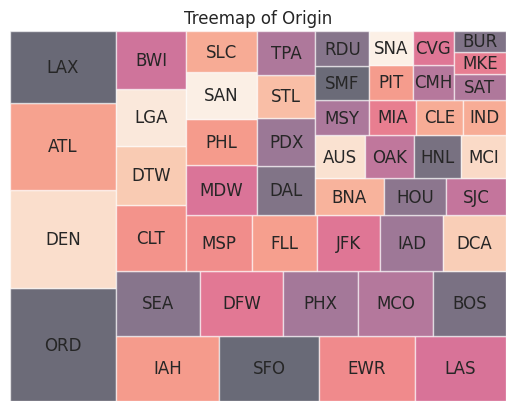

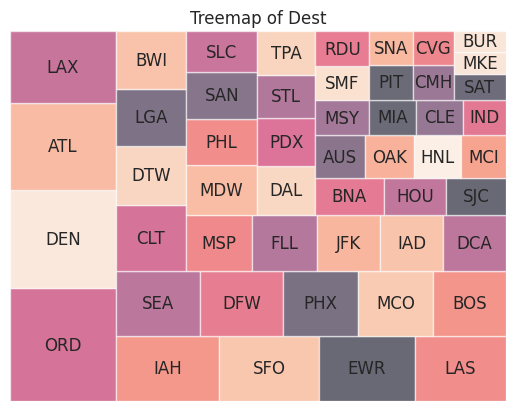

In [ ]:
import squarify
# Set seaborn plot style
sb.set_style(style="whitegrid")


def generate_treemap(variable, max_categories):
    top_categories = dataset[variable].value_counts().head(max_categories)
    sizes = top_categories.values
    labels = top_categories.index
    squarify.plot(sizes=sizes, label=labels, alpha=0.6).set(title=f'Treemap of {variable}')
    plt.axis('off')
    plt.show()


generate_treemap('Origin', 50)
generate_treemap('Dest', 50)

### Representation of Response Variable (Departure Delay Group) 

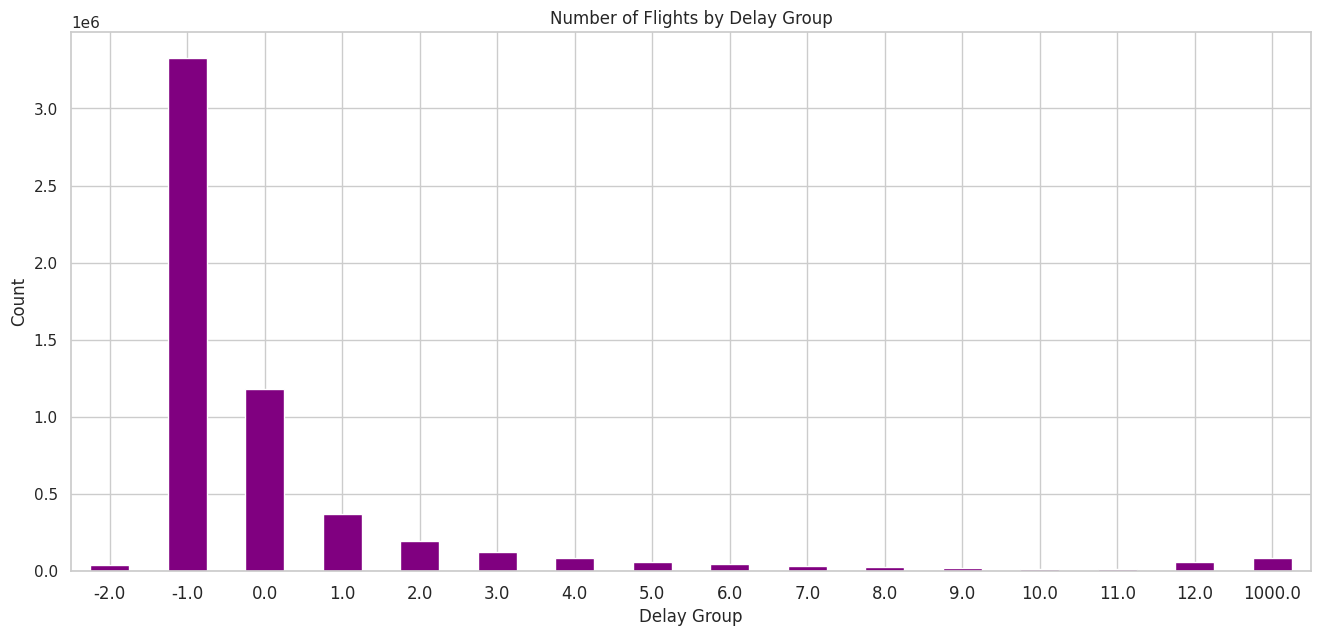

In [ ]:
plot_barplot(delay_group,'Delay Group','Count','Number of Flights by Delay Group', 'purple')

In [ ]:
dataset['DepartureDelayGroups'].value_counts()

DepartureDelayGroups
-1.0       3327771
 0.0       1182389
 1.0        370097
 2.0        197134
 3.0        123604
 1000.0      88373
 4.0         83047
 12.0        62078
 5.0         59415
 6.0         44605
-2.0         39338
 7.0         34338
 8.0         26201
 9.0         20406
 10.0        16512
 11.0        13091
Name: count, dtype: int64

Although its difficult to see due to its relatively small size, in the bar chart for Delay group there are 88373 flights with a delay group of 1000, indicating that there are 88373 delayed flights.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7ad411f4-2e47-4865-bde6-882717931af7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>